In [1]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow streamlit


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd

#stock
ticker = 'AAPL'

#date range
start = '2015-01-01'
end = '2025-07-14'

#historical stock data
df = yf.download(ticker, start=start, end=end)

#just the 'Close' price
df = df[['Close']]

#moving 'Date' from index to column
df.reset_index(inplace=True)

#renaming columns if necessary
df.columns = ['Date', 'Close']

df.tail()

/tmp/ipykernel_356/2046497386.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


,Date,Close
2641,2025-07-07,209.949997
2642,2025-07-08,210.009995
2643,2025-07-09,211.139999
2644,2025-07-10,212.410004
2645,2025-07-11,211.160004


In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = df[['Close']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)  
print("y shape:", y.shape)              


X shape: (2586, 60, 1)
y shape: (2586, 1)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#LSTM model architecture
model = Sequential()

# LSTM Layer 1
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Prevent overfitting

# LSTM Layer 2
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# LSTM Layer 3
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#next day's price
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X, y, epochs=20, batch_size=32)

2025-07-26 20:32:45.769533: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-26 20:32:46.194577: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-26 20:32:46.482472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753561966.778074     356 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753561966.876166     356 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753561967.487237     356 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/20


2025-07-26 20:32:53.991020: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/d376d39a-d054-4473-9ed3-5c7c9b3046a1/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0437
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0030
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0025
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0024
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0024
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0020
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0020
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0021
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0020
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0024
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0016
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0019
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0015
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0015
Epoch 15/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0015
Epoch 16/20
81/

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


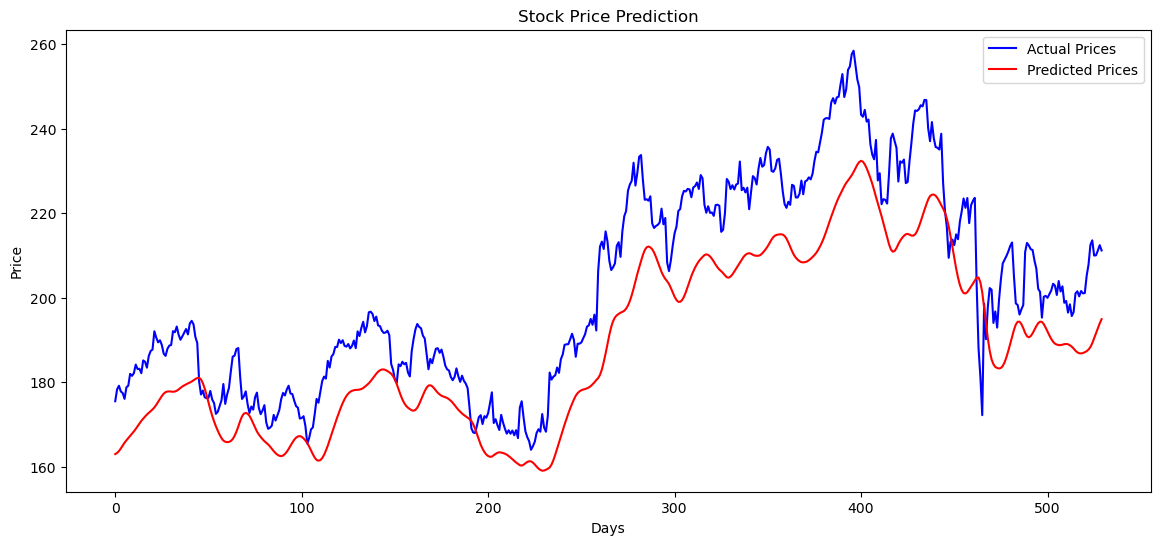

In [5]:
import matplotlib.pyplot as plt

#splitting the scaled data
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size - 60:]  # keep 60 extra for sequences

X_test = []
y_test = []

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test)

#Inverse scale (to get real price values)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

#plotting predictions vs actual prices
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


SMA AND RSI

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Create indicators
df['SMA_10'] = df['Close'].rolling(window=10).mean()

delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Drop rows with NaNs
df = df.dropna().copy()


In [7]:
# Use Close, SMA_10, RSI_14
features = ['Close', 'SMA_10', 'RSI_14']
data = df[features].values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Train-test split
sequence_length = 60
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]

X_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i])
    y_train.append(train_data[i][0])  # Predict Close price only

X_train = np.array(X_train)
y_train = np.array(y_train)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting Close price

model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


/home/d376d39a-d054-4473-9ed3-5c7c9b3046a1/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0344
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0016
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0015
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0012
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0011
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0013
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0012
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.5729e-04
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.3784e-04
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.1577e-04
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 9.0491e-04
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.9593e-04
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.

In [9]:
model.save("lstm_multivariate_model.h5")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/tmp/ipykernel_356/3092342347.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


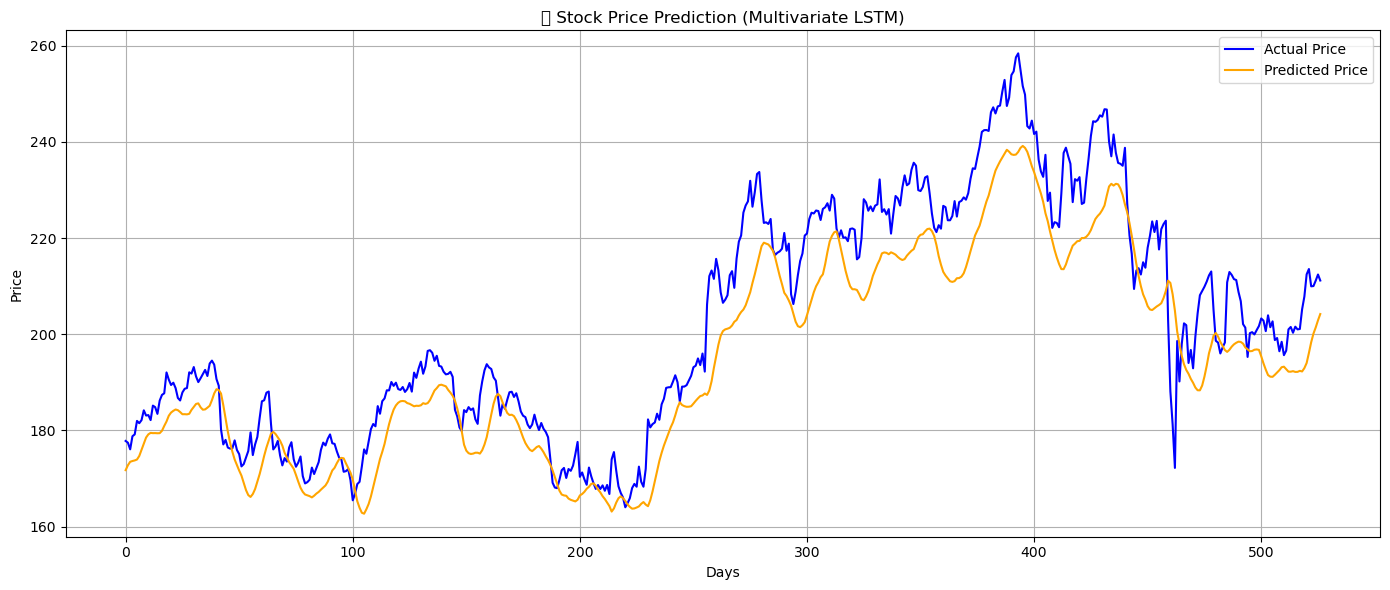

In [10]:
# Use the rest of the data for testing
test_data = scaled_data[train_size - sequence_length:]

X_test = []
y_test = []

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i])
    y_test.append(test_data[i][0])  # Only predict 'Close'

X_test = np.array(X_test)
y_test = np.array(y_test)

predicted_scaled = model.predict(X_test)

# Pad with dummy columns to match original shape for inverse scaling
predicted_full = np.concatenate([predicted_scaled, np.zeros((len(predicted_scaled), 2))], axis=1)
y_test_full = np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))], axis=1)

# Inverse transform
predicted_prices = scaler.inverse_transform(predicted_full)[:, 0]
actual_prices = scaler.inverse_transform(y_test_full)[:, 0]

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='orange')
plt.title('📈 Stock Price Prediction (Multivariate LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
